In [1]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf as rfc
from irf.utils import (
    get_prevalent_interactions,
    visualize_impurity_decrease,
    visualize_prevalent_interactions,
    get_filtered_feature_paths
)
import rpy2.robjects as robjects
from irf.irf_jupyter_utils import draw_tree
import utils

In [2]:
mask = ["zld", "bcd", "bcd", "cad", "D", "da", "dl", "ftz", "gt", "h",
         "h", "hb", "hb", "hkb", "hkb", "hkb", "kni", "kni", "kr", "kr", 
         "mad", "med", "prd", "prd", "run", "run", "shn", "shn", "slp1", "sna", 
         "sna", "tll", "twi", "twi", "z"]
mask = {x:y for x, y in enumerate(mask)}

# Simulate the settings in the signed iRF paper

## Simulation 1: and rule

In [3]:
X, y, interact_new = utils.load_data(i=0, name='Enhancer_new', rule='and')

In [4]:
interact_new

[[(0, 'R'), (4, 'R'), (18, 'R'), (29, 'R')]]

In [5]:
rf = rfc()

In [6]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 35 artists>

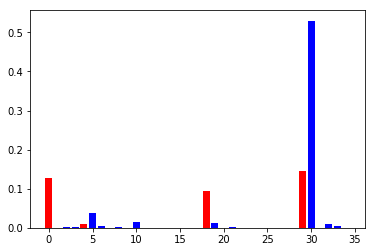

In [7]:
color = ['b' for x in range(35)]
for x in [0, 4, 18, 29]:
    color[x] = 'r'
plt.bar(np.arange(35), rf.feature_importances_, color=color)

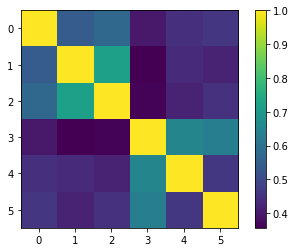

In [8]:
# look at the correlation between y_train and different features
plt.imshow(np.corrcoef(np.vstack([X[:,[0, 4, 18, 29, 30]].T, y.T])))
plt.colorbar()
plt.show()

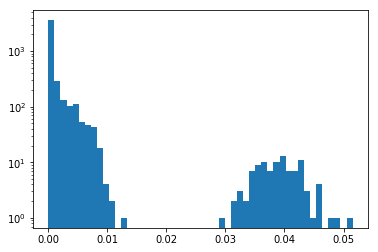

In [9]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [10]:
rf.n_paths

4852

In [11]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.001,
    min_support=100,
    signed=True,
    weight_scheme="depth",
    mask=mask,
)

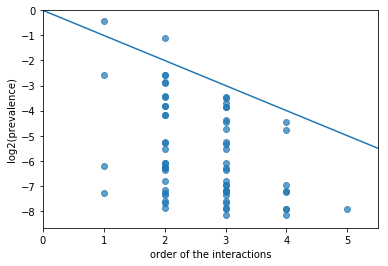

In [12]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [13]:
list(prevalence.items())[:20]

[((('sna', 'R'),), 0.743203124999997),
 ((('sna', 'L'), ('sna', 'R')), 0.4695312499999985),
 ((('kr', 'R'), ('sna', 'L'), ('sna', 'R'), ('zld', 'R')),
  0.045390624999999775),
 ((('kr', 'R'), ('sna', 'L'), ('sna', 'R')), 0.09195312499999979),
 ((('kr', 'L'), ('sna', 'L'), ('sna', 'R')), 0.08949218749999956),
 ((('kr', 'R'), ('sna', 'L'), ('sna', 'R'), ('zld', 'L')),
  0.03624999999999997),
 ((('sna', 'L'), ('sna', 'R'), ('zld', 'R')), 0.07679687499999967),
 ((('kr', 'R'), ('sna', 'R'), ('zld', 'R')), 0.06984374999999979),
 ((('sna', 'L'), ('sna', 'R'), ('zld', 'L')), 0.0693749999999999),
 ((('sna', 'R'), ('zld', 'L')), 0.16550781249999943),
 ((('sna', 'R'), ('zld', 'R')), 0.1654296874999993),
 ((('kr', 'L'), ('sna', 'R')), 0.13650390624999947),
 ((('kr', 'R'), ('sna', 'R')), 0.13517578124999946),
 ((('kr', 'R'), ('sna', 'R'), ('zld', 'L')), 0.04812499999999996),
 ((('kr', 'R'), ('sna', 'L'), ('zld', 'R')), 0.046015624999999775),
 ((('da', 'L'), ('kr', 'R'), ('sna', 'L'), ('sna', 'R'), 

In [14]:
utils.evaluate_model(y_true=interact_new, y_pred=list(prevalence.keys()), name="Enhancer_new", metric="strict")

array([0.25, 0.25, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75])

## Simulation 2: OR rule

In [15]:
X, y, interact_new = utils.load_data(i=0, name='Enhancer_new', rule='or')

In [16]:
rf = rfc()

In [17]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

In [18]:
interact_new

[[(4, 'R'), (18, 'R'), (0, 'L'), (29, 'L')],
 [(4, 'L'), (18, 'L'), (0, 'R'), (29, 'R')]]

<BarContainer object of 35 artists>

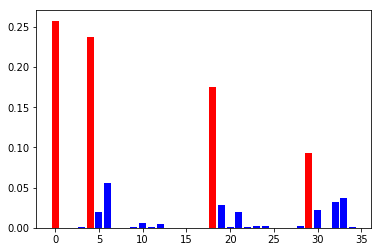

In [19]:
color = ['b' for x in range(35)]
for x in [4, 18, 0, 29]:
    color[x] = 'r'
plt.bar(
    np.arange(35),
    rf.feature_importances_,
    color = color,
)

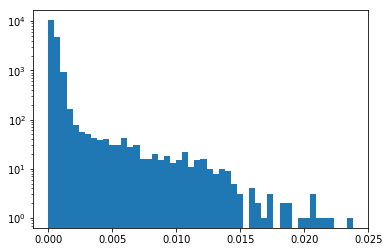

In [20]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [21]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=1e-3, min_support=500, signed=True, mask=mask)

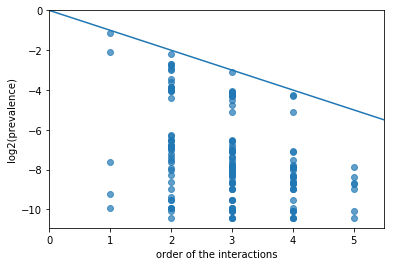

In [22]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [23]:
[[(mask[x[0]], x[1]) for x in interact] for interact in interact_new]

[[('D', 'R'), ('kr', 'R'), ('zld', 'L'), ('sna', 'L')],
 [('D', 'L'), ('kr', 'L'), ('zld', 'R'), ('sna', 'R')]]

In [24]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[((('D', 'R'), ('kr', 'R'), ('zld', 'L')), 0.11750000000000231),
 ((('D', 'R'), ('kr', 'R'), ('sna', 'L'), ('zld', 'L')), 0.05228515625000092),
 ((('D', 'R'), ('kr', 'R'), ('sna', 'R'), ('zld', 'L')), 0.05000219345092766),
 ((('kr', 'R'), ('zld', 'L')), 0.21609375000000583),
 ((('kr', 'R'),), 0.4571875000000172),
 ((('D', 'L'), ('kr', 'L'), ('sna', 'R'), ('zld', 'R')), 0.02890624999999989),
 ((('kr', 'R'), ('sna', 'R'), ('zld', 'L')), 0.06062719345092764),
 ((('kr', 'L'), ('sna', 'R')), 0.1539843749999996),
 ((('kr', 'L'), ('sna', 'L')), 0.1533301925659179),
 ((('kr', 'L'), ('sna', 'R'), ('zld', 'R')), 0.05812499999999971),
 ((('kr', 'R'), ('sna', 'L'), ('zld', 'L')), 0.05806640625000112),
 ((('D', 'R'), ('kr', 'R')), 0.14453125000000402),
 ((('D', 'R'), ('kr', 'R'), ('sna', 'L')), 0.05306640625000091),
 ((('D', 'R'), ('sna', 'L'), ('zld', 'L')), 0.05291015625000095),
 ((('D', 'R'), ('sna', 'R'), ('zld', 'L')), 0.05093969345092766),
 ((('D', 'R'), ('kr', 'R'), ('sna', 'R')), 0.05062719

In [26]:
utils.evaluate_model(y_true=interact_new, y_pred=list(prevalence.keys()), name="Enhancer_new", metric="strict")

array([0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

## Simulation 3: Add rule

In [27]:
X, y, interact_new = utils.load_data(i=0, name='Enhancer_new', rule='add')

In [28]:
rf = rfc()

In [29]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

In [30]:
[[(mask[x[0]], x[1]) for x in interact] for interact in interact_new]

[[('D', 'R'), ('gt', 'R'), ('kr', 'R')],
 [('zld', 'R'), ('sna', 'R'), ('twi', 'R')]]

<BarContainer object of 35 artists>

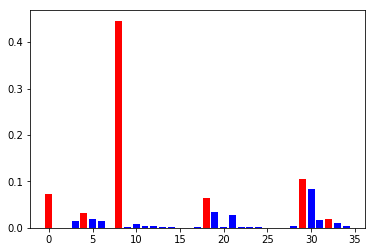

In [31]:
color = ['b' for x in range(80)]
for x in [4, 8, 18] + [0, 29, 32]:
    color[x] = 'r'
plt.bar(np.arange(35), rf.feature_importances_, color=color)

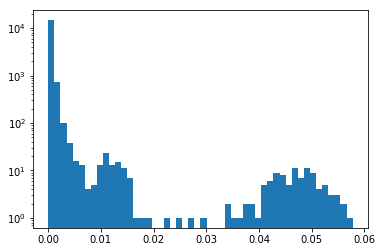

In [32]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [33]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.001, min_support=2000, signed=True, mask=mask)

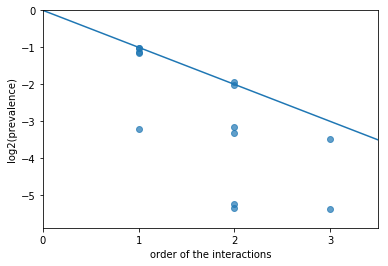

In [34]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [35]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[((('gt', 'R'), ('sna', 'L')), 0.2631445312500032),
 ((('gt', 'R'),), 0.4975000000000055),
 ((('gt', 'L'),), 0.4974999999999976),
 ((('gt', 'R'), ('sna', 'R')), 0.24633178710937298),
 ((('sna', 'L'),), 0.4604296875000062),
 ((('sna', 'R'),), 0.44977416992187125),
 ((('gt', 'R'), ('kr', 'R'), ('sna', 'L')), 0.08963050842285189),
 ((('gt', 'R'), ('kr', 'R')), 0.11322425842285179),
 ((('kr', 'R'), ('sna', 'L')), 0.09939613342285182),
 ((('D', 'R'), ('gt', 'R'), ('sna', 'L')), 0.023982553482055552),
 ((('D', 'R'), ('gt', 'R')), 0.026443490982055562),
 ((('D', 'R'), ('sna', 'L')), 0.024763803482055563),
 ((('zld', 'R'),), 0.10840881347656187)]

In [36]:
utils.evaluate_model(y_true=interact_new, y_pred=list(prevalence.keys()), name="Enhancer_new", metric="strict")

array([0.        , 0.16666667, 0.16666667, 0.16666667, 0.33333333,
       0.33333333, 0.33333333, 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       ])